In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df=pd.read_csv("C:\\Users\\thris\\Desktop\\wine-clustering.csv")
df.head(2)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [35]:
df.shape

(178, 13)

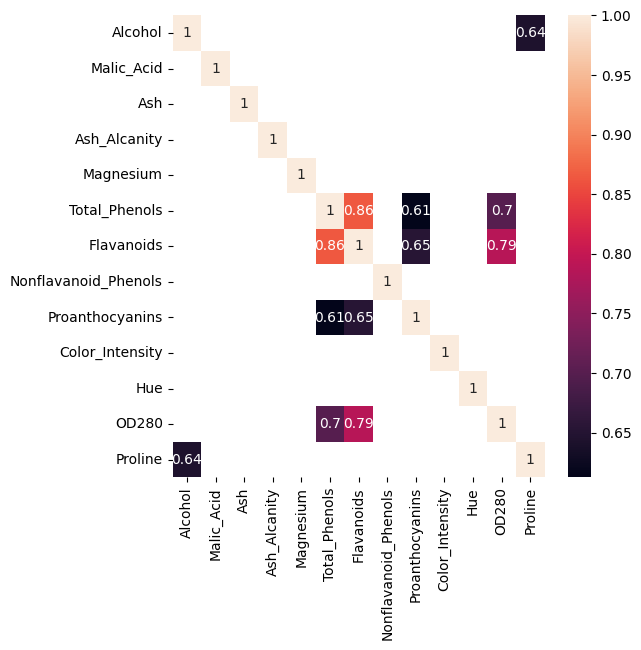

In [37]:
corr =df.corr().abs()
high_corr =corr[(corr)>0.6]
plt.figure(figsize =(6,6))
sns.heatmap(high_corr ,annot=True)
plt.show()

In [38]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
X_standardized =scaler.fit_transform(df)

In [39]:
from sklearn.model_selection import train_test_split
x_train,test=train_test_split(X_standardized,test_size=0.4,random_state=42)

In [40]:
x_val ,x_test =train_test_split(test ,test_size =0.5 ,random_state =42)

In [43]:
x_train =pd.DataFrame(x_train)
x_train.columns =df.columns
x_train.shape

(106, 13)

In [44]:
test =pd.DataFrame(test)
test.columns =df.columns
test.shape

(72, 13)

In [45]:
x_val =pd.DataFrame(x_val)
x_val.columns =x_train.columns
x_val.shape

(36, 13)

In [47]:
x_test =pd.DataFrame(x_test)
x_test.columns =x_train.columns
x_test.shape

(36, 13)

In [48]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [49]:
k_means = KMeans(n_clusters=3, n_init=5)

labels_train = k_means.fit_predict(x_train)
train_kmeans_avg =silhouette_score(x_train ,labels_train)

labels_validation =k_means.predict(x_val)
val_kmeans_avg =silhouette_score(x_val ,labels_validation)

labels_test =k_means.predict(x_test)
test_kmeans_avg =silhouette_score(x_test ,labels_test)

In [51]:
results=[]
results.append({"Model Name":"KMeans" ,
               "Training Set":train_kmeans_avg ,
               "Validation Test":val_kmeans_avg ,
               "X Test":test_kmeans_avg})

results

[{'Model Name': 'KMeans',
  'Training Set': 0.2808620526436533,
  'Validation Test': 0.26897452670931055,
  'X Test': 0.2917317787282072}]

The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. 

Silhoutte Score : 0.2808620526436533


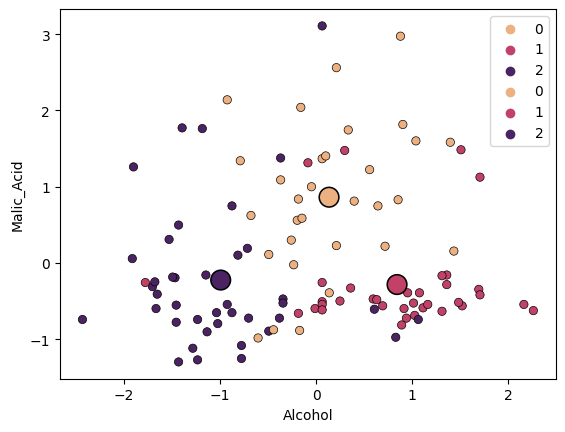

In [52]:
sns.scatterplot(x =x_train.iloc[ : ,0] ,y =x_train.iloc[ : ,1] ,
                data =x_train ,hue =labels_train ,palette='flare' ,edgecolor ='k')

centers_df = pd.DataFrame(k_means.cluster_centers_[: , :2], columns=['x', 'y'])
sns.scatterplot(x='x',y='y',data=centers_df,s=200,hue=range(len(centers_df)),
                palette='flare',edgecolor='k' ,markers="X")

print("Silhoutte Score :" ,train_kmeans_avg)
plt.show()

<Axes: xlabel='Alcohol', ylabel='Malic_Acid'>

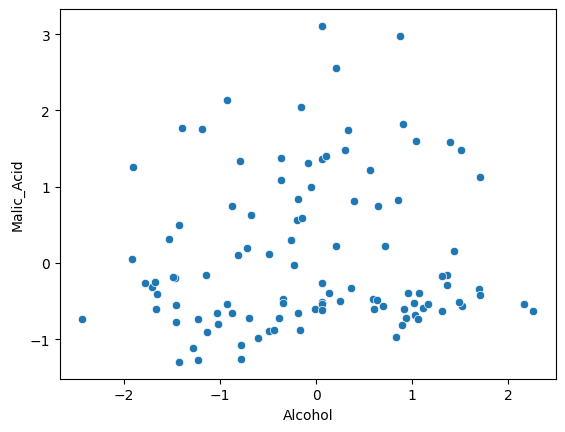

In [54]:
sns.scatterplot(x="Alcohol",y="Malic_Acid",data=x_train)

In [55]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)

In [57]:
x_train_pca = pca.fit_transform(x_train)
x_val_pca = pca.fit_transform(x_val)
x_test_pca = pca.fit_transform(x_test)

# Visualize the data after PCA
df_train_pca = pd.DataFrame(data=x_train_pca
                            , columns=['PC1', 'PC2'])

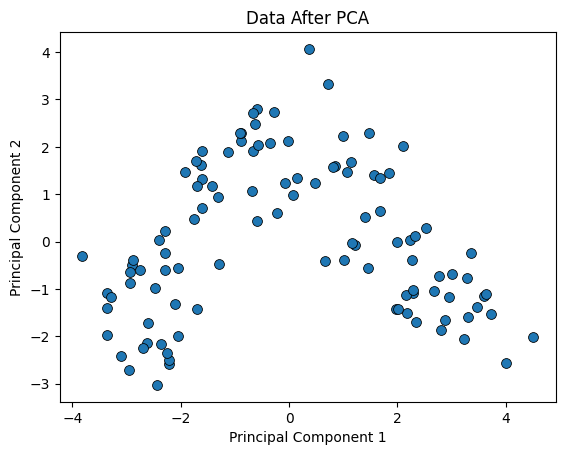

In [58]:
sns.scatterplot(x='PC1'
                , y='PC2'
                , data=df_train_pca
                , marker='o'
                , s=50
                , edgecolor='k')

plt.title('Data After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

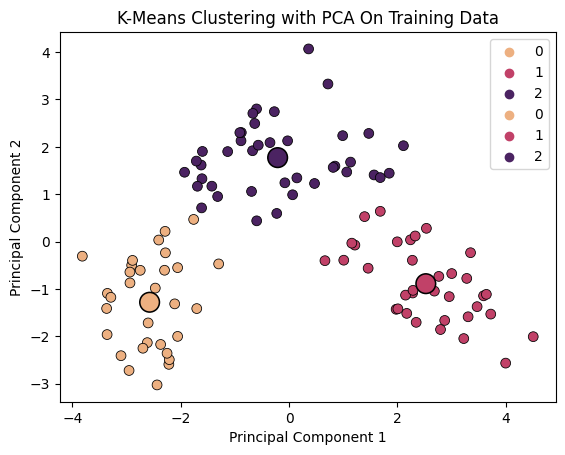

In [59]:
k_means = KMeans(n_clusters=3, random_state=42,n_init=10)
labels = k_means.fit_predict(x_train_pca)
labels_val = k_means.predict(x_val_pca)
labels_test = k_means.predict(x_test_pca)

# Silhouette_score for train, val ,test sets
train_pca_avg = silhouette_score(x_train_pca, labels)
val_pca_avg = silhouette_score(x_val_pca, labels_val)
test_pca_avg = silhouette_score(x_test_pca, labels_test)

# Visualize the clustering result

centers_df = pd.DataFrame(k_means.cluster_centers_[: , :2], columns=['x', 'y'])

sns.scatterplot(x='PC1'
                , y='PC2' 
                ,data=df_train_pca
                , hue=labels_train
                , marker='o'
                , s=50
                ,palette='flare'
                ,edgecolor='k')

#plt.scatter(x=centers_df["x"], y=centers_df["y"], marker='o',s=200, c=range(len(centers_df)), label=labels_train ,cmap='viridis')

sns.scatterplot(x='x',y='y',data=centers_df,s=200,hue=range(len(centers_df)),
                palette='flare',edgecolor='k' ,markers="*")

plt.title('K-Means Clustering with PCA On Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

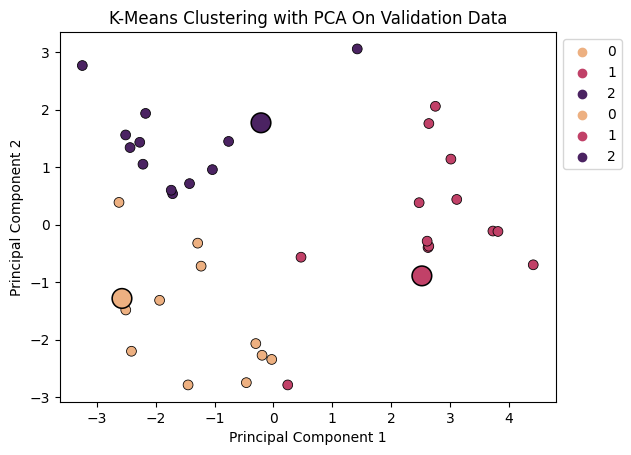

Silhouette Score on Validation Set: 0.4573229114021159


In [60]:
centers_val =pd.DataFrame(k_means.cluster_centers_ ,columns =['x' ,'y'])


sns.scatterplot(x =x_val_pca[: ,0] ,y =x_val_pca[: ,1] , hue=labels_val, marker='o', s=50,palette='flare',edgecolor='k')

sns.scatterplot(x ='x' ,y ='y' ,data =centers_val ,s =200 ,hue =range(len(centers_val)) ,palette='flare'
               ,edgecolor='k' ,markers ='*')


plt.title('K-Means Clustering with PCA On Validation Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


print(f'Silhouette Score on Validation Set: {val_pca_avg}')

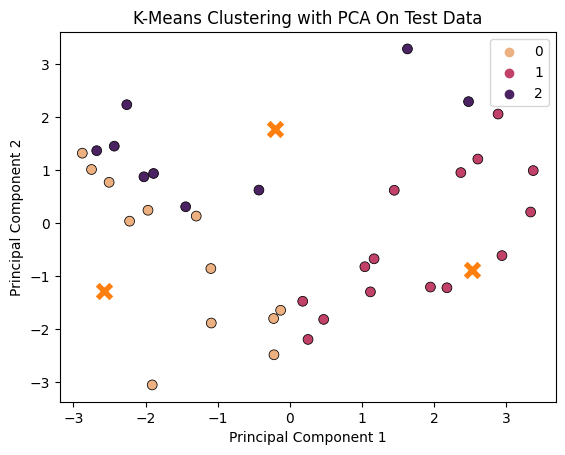

Silhouette Score on Validation Set: 0.20189294490586668


In [61]:
scatter = sns.scatterplot(x= x_test_pca[:, 0]
                          , y=x_test_pca[:, 1]
                          , hue=labels_test
                          , marker='o'
                          , s=50
                          , edgecolor='k'
                          ,palette='flare')


sns.scatterplot(x= k_means.cluster_centers_[:, 0]
                , y= k_means.cluster_centers_[:,1]
                , marker='X'
                , s=200)

plt.title('K-Means Clustering with PCA On Test Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

print(f'Silhouette Score on Validation Set: {test_pca_avg}')
